In [147]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as mlt
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [3]:
titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
y = titanic_data.Survived

In [6]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [7]:
x = pd.get_dummies(x) #преобразуем все строовые переменные в числовые 

In [8]:
x = x.fillna({'Age': x.Age.median()})

In [9]:
x.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [10]:
classifier = tree.DecisionTreeClassifier(criterion='entropy')

In [11]:
classifier.fit(x, y) #Overtraining

DecisionTreeClassifier(criterion='entropy')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [13]:
classifier.score(x, y) #точность ответов

0.9797979797979798

In [14]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [15]:
classifier.score(x_train, y_train)

0.9798657718120806

In [16]:
classifier.score(x_test, y_test) #понимаем, что сильно переобучили дерево

0.7661016949152543

In [17]:
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3) #ограничение на количество запросов дерева

In [18]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
classifier.score(x_train, y_train)

0.8238255033557047

In [20]:
classifier.score(x_test, y_test)

0.8203389830508474

In [116]:
score_data = pd.DataFrame()

In [117]:
for max_depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(x_train, y_train)
    train_data = clf.score(x_train, y_train)
    test_data = clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv = 10).mean()
    ser = pd.DataFrame({'train_score' : [train_data], 
                     'test_score' : [test_data], 
                     'cross_val_score' : [mean_cross_val_score],
                     'max_depth' : [max_depth]})
    score_data = pd.concat([score_data, ser])

In [118]:
score_data = pd.melt(score_data, 
                     id_vars = ['max_depth'], 
                     value_vars = ['train_score', 'test_score', 'cross_val_score'], 
                     var_name = 'set_type', 
                     value_name = 'score')

In [119]:
score_data 

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.768644
293,96,cross_val_score,0.770311
294,97,cross_val_score,0.770282
295,98,cross_val_score,0.771949


<Axes: xlabel='max_depth', ylabel='score'>

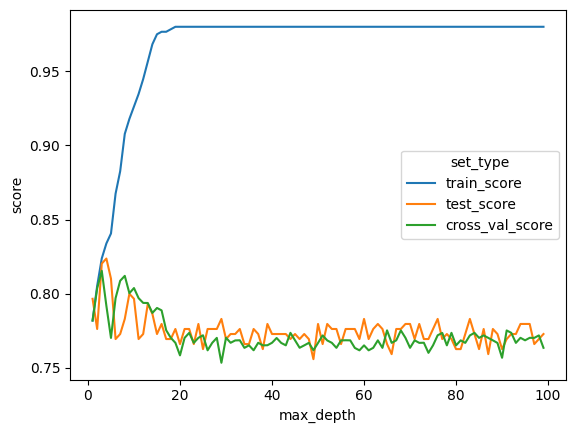

In [120]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = score_data)

In [132]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth' : range(1, 100)}

In [133]:
GridSearchCV_clf = GridSearchCV(clf, parametrs, cv = 5, scoring = 'accuracy')

In [134]:
GridSearchCV_clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              max_depth=99),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 100)},
             scoring='accuracy')

In [135]:
GridSearchCV_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [138]:
clf = GridSearchCV_clf.best_estimator_

In [140]:
clf.score(x_test, y_test)

0.7694915254237288

In [145]:
precision_score(y_test, clf.predict(x_test))

0.8023255813953488

In [150]:
recall_score(y_test, clf.predict(x_test))

0.575